#### 1.) Gambling, Poker, Trading and Edge

##### Expected Value (Edge)

In a game or system that involves betting and randomness, expected value tells us something about the dynamics of our wealth path over a series of repetitive experiments

We accumulate this EV over time (in a positive or negative way) but in **games of chance** we don't influence this EV

Oftentimes we can use the law of total expectation to discern the EV of a well-defined closed system

$$E[X] = \sum_{i=1}^n P(A_i)E[X|A_i]$$

where $\{A_1,...,A_n\}$ are disjoint events (Law of Total Expectation)

This does not tell us what *sample path* we will walk, but if the value is stable over a series of repeated experiments it suggests a general trajectory.

###### ______________________________________________________________________________________________________________________________________

#####  Games of Chance

Let's use roulette as an example...

*For a player betting $1 on red in American roulette:*

$E[X_{player}] = (18/38 \times \$1) + (20/38 \times -\$1) = -\$0.0526$ per bet

For the casino on any $1 bet:

$E[X_{casino}] = (20/38 \times \$1) + (18/38 \times -\$1) = \$0.0526$ per bet


This is a *fixed* game of chance, there is *no optimal decision* to make in the face of this uncertainty.

Statistically players will lose their entire bankroll should they continue to play the game.

More formally, the game's randomness is defined (by its probability mass function) and does not change over time (time invariant).

The EV of your wealth path is entirely dependent on the probability mass function (the game's randomness) which is defined against the player and for the casino!

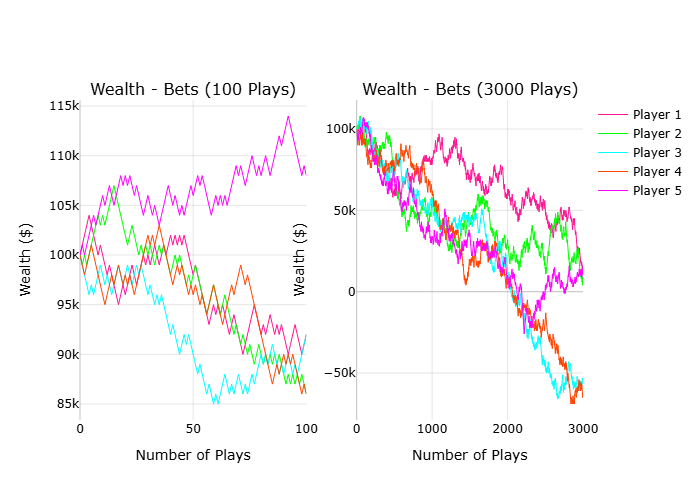

In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate sample paths for American roulette players
np.random.seed(42)

def create_roulette_paths(n_plays):
    n_players = 5
    bet_size = 1000  # Fixed bet size
    payout = 2   # Payout is 2x the bet (1:1 odds, you get your bet back plus equal amount)
    p_win = 18/38  # Probability of winning on red (18 red numbers out of 38 total)

    # Generate player wealth paths
    player_wealth = np.zeros((n_players, n_plays+1))
    player_wealth[:,0] = 100000  # Starting wealth of 100k

    for i in range(n_plays):
        # Generate outcomes for all players
        wins = np.random.random(n_players) < p_win
        player_wealth[:,i+1] = player_wealth[:,i] - bet_size  # Place bets
        player_wealth[:,i+1] += wins * (payout * bet_size)    # Add winnings (2x bet on win)
    
    return player_wealth

# Create paths for both timeframes
player_wealth_100 = create_roulette_paths(100)
player_wealth_10k = create_roulette_paths(3000)

# Create subplots - 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        'Wealth - Bets (100 Plays)', 
        'Wealth - Bets (3000 Plays)'
    ),
    horizontal_spacing=0.1
)

# Neon colors for players
neon_colors = ['#FF1493', '#00FF00', '#00FFFF', '#FF4500', '#FF00FF']

# Plot 100 plays data
for i in range(5):
    fig.add_trace(
        go.Scatter(
            x=np.arange(101),
            y=player_wealth_100[i,:],
            mode='lines',
            name=f'Player {i+1}',
            line=dict(color=neon_colors[i], width=1),
            showlegend=True
        ),
        row=1, col=1
    )

# Plot 10000 plays data
for i in range(5):
    fig.add_trace(
        go.Scatter(
            x=np.arange(10001),
            y=player_wealth_10k[i,:],
            mode='lines',
            name=f'Player {i+1}',
            line=dict(color=neon_colors[i], width=1),
            showlegend=False
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    width=1200,
    height=500,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color= "black")
)

# Update axes
for col in [1,2]:
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        title_text="Number of Plays",
        row=1, col=col
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        title_text="Wealth ($)",
        row=1, col=col
    )

fig.show("png")


##### Games of Incomplete Information

Poker and Trading are trickier - the same concept of EV applies but there is no probability mass or density function defining the randomness.

The theoretical distribution governing the randomness is not static and depends on a lot of things **including our own decision making!**

Below is an example with roulette but here players can make an **optimal decision** as the system is not governed strictly by a probability mass function

The likelihood of red decreases if red is seen and same with black, some players take advantage of this and others don't

Even with this edge sometimes they are unlucky and there is a drawdown in the optimal players' wealth paths...

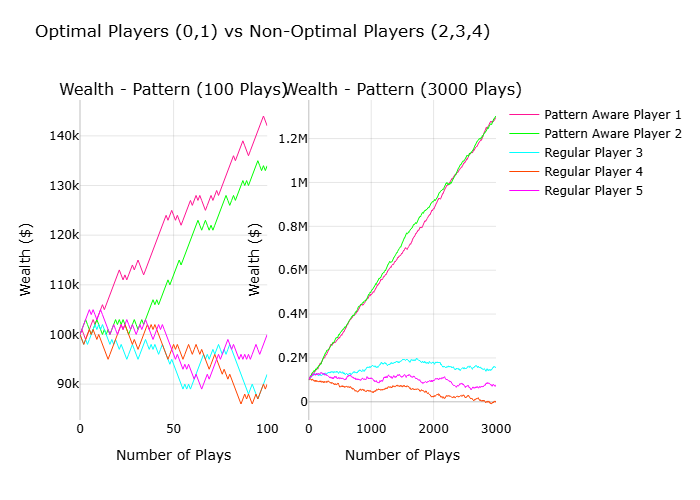

In [2]:
# Generate sample paths for American roulette players with dependency structure
np.random.seed(42)

def create_dependent_roulette_paths(n_plays):
    n_players = 5
    bet_size = 1000  # Fixed bet size
    payout = 2   # Payout is 2x the bet (1:1 odds)
    p_win_base = 18/38  # Base probability of winning on red
    
    # Generate player wealth paths
    player_wealth = np.zeros((n_players, n_plays+1))
    player_wealth[:,0] = 100000  # Starting wealth of 100k
    
    # Track last outcome (True = red, False = black)
    last_was_red = True  # Arbitrary starting state
    
    # Some players recognize the pattern
    smart_players = [0, 1]  # First two players adapt to the pattern
    
    for i in range(n_plays):
        # Adjust probabilities based on last outcome
        if last_was_red:
            p_win = 0.3  # Probability of red after red
        else:
            p_win = 0.7  # Probability of red after black
            
        # Generate outcomes
        for j in range(n_players):
            if j in smart_players:
                # Smart players bet according to the pattern
                if last_was_red:
                    # Bet on black when last was red
                    wins = np.random.random() > p_win
                else:
                    # Bet on red when last was black
                    wins = np.random.random() < p_win
            else:
                # Other players always bet on red
                wins = np.random.random() < p_win
                
            player_wealth[j,i+1] = player_wealth[j,i] - bet_size
            player_wealth[j,i+1] += wins * (payout * bet_size)
        
        # Update last outcome for next iteration
        last_was_red = np.random.random() < p_win
    
    return player_wealth

# Create paths for both timeframes with dependency
player_wealth_100 = create_dependent_roulette_paths(100)
player_wealth_10k = create_dependent_roulette_paths(3000)

# Create subplots - 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        'Wealth - Pattern (100 Plays)', 
        'Wealth - Pattern (3000 Plays)'
    ),
    horizontal_spacing=0.1
)

# Neon colors for players
neon_colors = ['#FF1493', '#00FF00', '#00FFFF', '#FF4500', '#FF00FF']

# Plot 100 plays data
for i in range(5):
    label = 'Pattern Aware Player ' if i < 2 else 'Regular Player '
    fig.add_trace(
        go.Scatter(
            x=np.arange(101),
            y=player_wealth_100[i,:],
            mode='lines',
            name=f'{label}{i+1}',
            line=dict(color=neon_colors[i], width=1),
            showlegend=True
        ),
        row=1, col=1
    )

# Plot 3000 plays data
for i in range(5):
    fig.add_trace(
        go.Scatter(
            x=np.arange(3001),
            y=player_wealth_10k[i,:],
            mode='lines',
            name=f'Player {i+1}',
            line=dict(color=neon_colors[i], width=1),
            showlegend=False
        ),
        row=1, col=2
    )

# Update layout
fig.update_layout(
    width=1200,
    height=500,
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black'),
    title=dict(
        text='Optimal Players (0,1) vs Non-Optimal Players (2,3,4)',
        y=0.95
    )
)

# Update axes
for col in [1,2]:
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        title_text="Number of Plays",
        row=1, col=col
    )
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='rgba(128,128,128,0.5)',
        title_text="Wealth ($)",
        row=1, col=col
    )

fig.show("png")


** Example: Poker**
- Players at the table change the dynamics of the game and EV
- Your initial bankroll changes how you play and the dynamics of the game and EV
- Your last hand changes how you play and the dynamics of the game and EV

** Example: Trading**
- The current macro regime changes the dynamics of the game and EV
- Your last trade changes the dynamics of your choices and EV
- Your portfolio value changes the dynamics of your choics and EV

There are too many factors to consider or measure to compute EV.  

Sure some may capture more variability than others, but we aren't focusing on this idea right now.

So if these systems are far more complex, how do we measure EV?

We can proxy EV based on some sort of system of decision making looking backwards at data but that isn't indicative of future performance.

**So is there any justification for the abilities of poker players and professional traders?**

**Absolutely, but sometimes** there are several considerations to discern skill vs. luck and it isn't a trivial problem

A simple argument given by reinforcement learning

- Poker bot close to net 0 EV as possible and the other players will accumulate so much more negative EV

- Reinforcement learning can learn optimal hedging policies


---

#### 2.) Example: Day Traders

Let's look at an example that is *very generous* where day trader are operating with net zero EV.

$E[R] = P(win) \cdot R_{win} + P(loss) \cdot R_{loss} = 0$

Sure, these values are likely not static, nevertheless it is far more likely that they are acting with net negative EV as many are likely ill informed.

Consider this a *best case* argument for day trading...

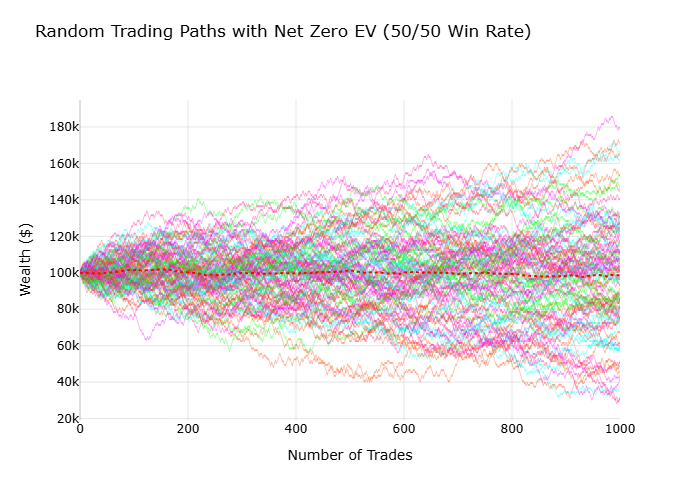

In [3]:
# Generate sample paths for random traders
np.random.seed(42)

def create_trading_paths(n_trades):
    n_traders = 100  # Number of traders
    bet_size = 1000  # Fixed bet size
    payout = 1  # Win amount equals loss amount (net 0 EV)
    p_win = 0.5  # 50/50 odds
    
    # Generate trader wealth paths
    trader_wealth = np.zeros((n_traders, n_trades+1))
    trader_wealth[:,0] = 100000  # Starting wealth of 100k
    
    for i in range(n_trades):
        # Generate outcomes for each trader
        for j in range(n_traders):
            wins = np.random.random() < p_win
            if wins:
                trader_wealth[j,i+1] = trader_wealth[j,i] + bet_size
            else:
                trader_wealth[j,i+1] = trader_wealth[j,i] - bet_size
    
    return trader_wealth

# Create paths for 1000 trades
trader_wealth = create_trading_paths(1000)

# Create figure
fig = go.Figure()

# Neon colors for traders
neon_colors = ['#FF1493', '#00FF00', '#00FFFF', '#FF4500', '#FF00FF']

# Plot trading paths
for i in range(100):
    fig.add_trace(
        go.Scatter(
            x=np.arange(1001),
            y=trader_wealth[i,:],
            mode='lines',
            showlegend=False,
            opacity=0.3,
            line=dict(color=neon_colors[i % 5], width=1)
        )
    )

# Add mean line
mean_wealth = np.mean(trader_wealth, axis=0)
fig.add_trace(
    go.Scatter(
        x=np.arange(1001),
        y=mean_wealth,
        mode='lines',
        line=dict(color='red', width=2, dash='dot'),
        name='Mean'
    )
)

# Update layout
fig.update_layout(
    width=1000,
    height=500,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black'),
    title=dict(
        text='Random Trading Paths with Net Zero EV (50/50 Win Rate)',
        y=0.95
    )
)

# Update axes
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    title_text="Number of Trades"
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    title_text="Wealth ($)"
)

fig.show("png")


Number of traders with >50% return: 7 out of 100
Percentage of successful traders: 7%


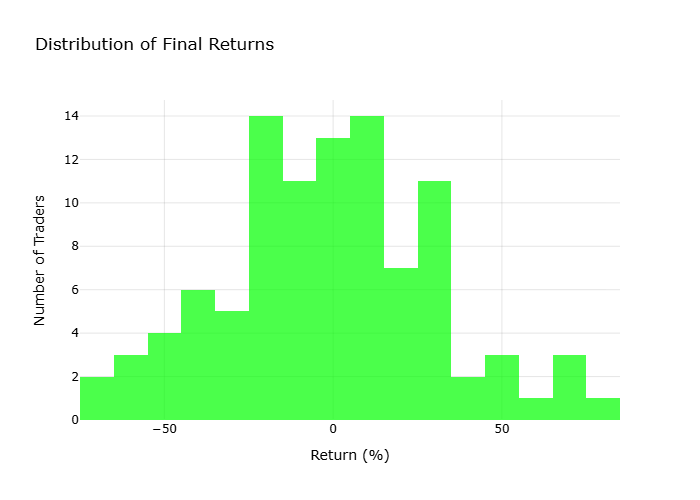

In [4]:
# Calculate final returns for each trader
final_returns = (trader_wealth[:,-1] - trader_wealth[:,0]) / trader_wealth[:,0] * 100

# Count traders with >50% return
successful_traders = np.sum(final_returns > 50)

print(f"Number of traders with >50% return: {successful_traders} out of 100")
print(f"Percentage of successful traders: {successful_traders}%")

# Create histogram of final returns
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=final_returns,
        nbinsx=20,
        marker_color='#00FF00',
        opacity=0.7
    )
)

fig.update_layout(
    width=800,
    height=400,
    title="Distribution of Final Returns",
    xaxis_title="Return (%)",
    yaxis_title="Number of Traders",
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black')
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)'
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)'
)

fig.show("png")


In [5]:
# Calculate drawdowns for each trader
drawdowns = np.zeros(100)
for i in range(100):
    # Get minimum wealth relative to starting wealth
    min_wealth = np.min(trader_wealth[i,:])
    starting_wealth = trader_wealth[i,0]
    if min_wealth < starting_wealth:
        drawdowns[i] = 1

# Calculate fraction of traders with drawdowns        
fraction_with_drawdowns = np.mean(drawdowns)

print(f"Fraction of traders who experienced drawdowns: {fraction_with_drawdowns:.1%}")
print(f"Number of traders who experienced drawdowns: {int(fraction_with_drawdowns * 100)} out of 100")

Fraction of traders who experienced drawdowns: 99.0%
Number of traders who experienced drawdowns: 99 out of 100


7% accumulated wealth beyond 50% return, but 99 out of 100 in this simulation had a drawdown at one point of LESS than their initial investment

If they quit during that drawdown (many academic studies suggest traders quit day trading after ending up with losses) they wouldn't acheive **any** return even if their wealth path was *randomly lucky*

So this is an overstatement and a best case - we observed out of 100 traders if a few folks stuck around, yes, they could generate nice returns

**BUT THIS IS A COMPLETELY RANDOM ENVIORNMENT**  imagine these traders thinking they are making good decisions but are simply just lucky!

There are *plenty* of people in the world for this to be the case, this is common survivorship bias

People don't understand the numbers in this capacity...of course some uninformed net 0EV traders will make a ton of money...the vast majority quit with losses

Let's look at another performance metric: **Sharpe ratios**

Top 3 Sharpe Ratios:
Trader 44: 1.30
Trader 63: 1.16
Trader 58: 1.06


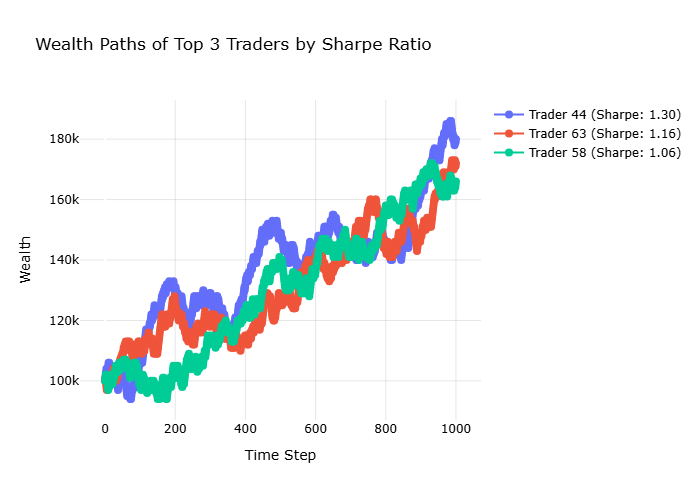

In [6]:
# Calculate returns for each trader
returns = np.diff(trader_wealth, axis=1) / trader_wealth[:,:-1]

# Calculate Sharpe ratios
mean_returns = np.mean(returns, axis=1)
std_returns = np.std(returns, axis=1)
sharpe_ratios = mean_returns / std_returns * np.sqrt(252)  # Annualized

# Get indices of top 3 Sharpe ratios
top_3_indices = np.argsort(sharpe_ratios)[-3:][::-1]

# Print results
print("Top 3 Sharpe Ratios:")
for i, idx in enumerate(top_3_indices):
    print(f"Trader {idx}: {sharpe_ratios[idx]:.2f}")

# Create line plot of top 3 Sharpe ratios
fig = go.Figure()

# Get wealth paths for top 3 traders
for idx in top_3_indices:
    fig.add_trace(
        go.Scatter(
            x=np.arange(trader_wealth.shape[1]),
            y=trader_wealth[idx,:],
            mode='lines+markers',
            name=f'Trader {idx} (Sharpe: {sharpe_ratios[idx]:.2f})',
            marker=dict(size=8)
        )
    )

fig.update_layout(
    width=800,
    height=400,
    title="Wealth Paths of Top 3 Traders by Sharpe Ratio",
    xaxis_title="Time Step",
    yaxis_title="Wealth",
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black')
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)'
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)'
)

fig.show("png")

**Remark:** These Sharpe ratios are a function of randomness, they mean literally nothing!  Those traders were operating with net 0EV!

Unlike poker where someone's net -EV can contribute positively toward yours, trading may be a zero sum game but other agent's -EV does not necessarily contribute positively toward your EV...  

*Moreover*

**This says nothing of the skill of these traders** we gave them the benefit of the doubt here with net 0EV this is not going to be the case!

##### THEY WERE **"CONSISTENTLY PROFITABLE"** BUT THEIR ACTIONS WERE ENTIRELY RANDOM WITH NET 0EV

---

#### 3.) Example: "Profitable" Day Trading

Let's look at an example that is *very generous* where day trader are operating with net zero EV.

$E[R] = P(win) \cdot R_{win} + P(loss) \cdot R_{loss} > 0$

Consider this a *golden case* argument for day trading...

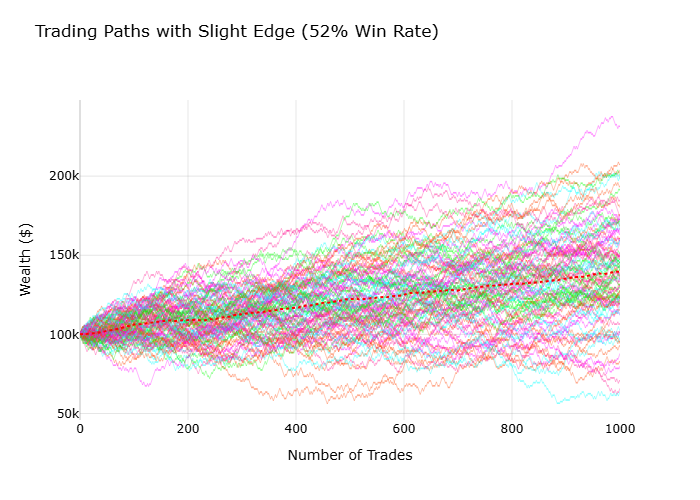

In [7]:
# Generate sample paths for traders with slight edge
np.random.seed(42)

def create_trading_paths_with_edge(n_trades):
    n_traders = 100  # Number of traders
    bet_size = 1000  # Fixed bet size
    payout = 1  # Win amount equals loss amount
    p_win = 0.52  # Slight edge: 52% win rate
    
    # Generate trader wealth paths
    trader_wealth = np.zeros((n_traders, n_trades+1))
    trader_wealth[:,0] = 100000  # Starting wealth of 100k
    
    for i in range(n_trades):
        # Generate outcomes for each trader
        for j in range(n_traders):
            wins = np.random.random() < p_win
            if wins:
                trader_wealth[j,i+1] = trader_wealth[j,i] + bet_size
            else:
                trader_wealth[j,i+1] = trader_wealth[j,i] - bet_size
    
    return trader_wealth

# Create paths for 1000 trades
trader_wealth = create_trading_paths_with_edge(1000)

# Create figure
fig = go.Figure()

# Neon colors for traders
neon_colors = ['#FF1493', '#00FF00', '#00FFFF', '#FF4500', '#FF00FF']

# Plot trading paths
for i in range(100):
    fig.add_trace(
        go.Scatter(
            x=np.arange(1001),
            y=trader_wealth[i,:],
            mode='lines',
            showlegend=False,
            opacity=0.3,
            line=dict(color=neon_colors[i % 5], width=1)
        )
    )

# Add mean line
mean_wealth = np.mean(trader_wealth, axis=0)
fig.add_trace(
    go.Scatter(
        x=np.arange(1001),
        y=mean_wealth,
        mode='lines',
        line=dict(color='red', width=2, dash='dot'),
        name='Mean'
    )
)

# Update layout
fig.update_layout(
    width=1000,
    height=500,
    showlegend=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black'),
    title=dict(
        text='Trading Paths with Slight Edge (52% Win Rate)',
        y=0.95
    )
)

# Update axes
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    title_text="Number of Trades"
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='rgba(128,128,128,0.5)',
    title_text="Wealth ($)"
)

fig.show("png")


Number of traders with >50% return: 32 out of 100
Percentage of successful traders: 32%


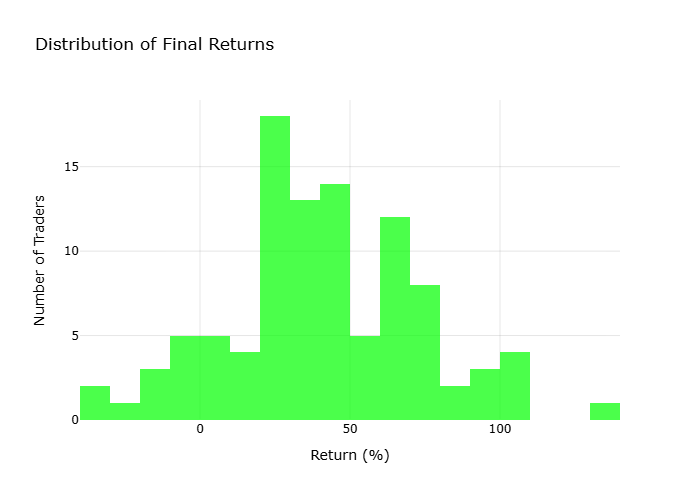

In [8]:
# Calculate final returns for each trader
final_returns = (trader_wealth[:,-1] - trader_wealth[:,0]) / trader_wealth[:,0] * 100

# Count traders with >50% return
successful_traders = np.sum(final_returns > 50)

print(f"Number of traders with >50% return: {successful_traders} out of 100")
print(f"Percentage of successful traders: {successful_traders}%")

# Create histogram of final returns
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=final_returns,
        nbinsx=20,
        marker_color='#00FF00',
        opacity=0.7
    )
)

fig.update_layout(
    width=800,
    height=400,
    title="Distribution of Final Returns",
    xaxis_title="Return (%)",
    yaxis_title="Number of Traders",
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(color='black')
)

fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)'
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='rgba(128,128,128,0.2)'
)

fig.show("png")


In [9]:
# Calculate drawdowns for each trader
drawdowns = np.zeros(100)
for i in range(100):
    # Get minimum wealth relative to starting wealth
    min_wealth = np.min(trader_wealth[i,:])
    starting_wealth = trader_wealth[i,0]
    if min_wealth < starting_wealth:
        drawdowns[i] = 1

# Calculate fraction of traders with drawdowns        
fraction_with_drawdowns = np.mean(drawdowns)

print(f"Fraction of traders who experienced drawdowns: {fraction_with_drawdowns:.1%}")
print(f"Number of traders who experienced drawdowns: {int(fraction_with_drawdowns * 100)} out of 100")

Fraction of traders who experienced drawdowns: 94.0%
Number of traders who experienced drawdowns: 94 out of 100


Even with an edge 94/100 traders in this sample had a drawdown beneath their initial investment.



In [10]:
# Calculate fraction of traders who lost money at the end
losses = np.zeros(100)
for i in range(100):
    final_wealth = trader_wealth[i,-1]
    starting_wealth = trader_wealth[i,0]
    if final_wealth < starting_wealth:
        losses[i] = 1
        
fraction_with_losses = np.mean(losses)

print(f"Fraction of traders who lost money: {fraction_with_losses:.1%}")
print(f"Number of traders who lost money: {int(fraction_with_losses * 100)} out of 100")

Fraction of traders who lost money: 11.0%
Number of traders who lost money: 11 out of 100




##### **Reality** 

The disatisfying answer is the space contains both folks acting optimally accumulating significant wealth and folks who are just operating randomly (but they think they're making good decisions) and are also accumulating that wealth

There are *plenty* of sample paths for this to be the case, the more humble among them will quietly make their money and the idiots who don't know anything will portray themselves as trading gods that are "historically and consistently profitable"

The alternative for these gurus? They're just lying...